# Knowledge Graph

In this notebook, we will create a Knowledge Graph that visualizes the similarities between applicants and their resumes and the required skills for a job vacancy. The graph will consist of a main node for 'Resume' and another main node for the job requirements. The skills related to each node will be connected to their respective main node, with the thickness of the connections representing the years of experience.

To begin, we will define the required skills for the job vacancy. As an example, we will use my own resume. We will then utilize our own pretrained Information Extraction algorithm to extract skill entities from my resume. 

In [9]:
import numpy as np
from sklearn.cluster import KMeans
import spacy
import nltk
import re
import pandas as pd
import os

nlp_ner = spacy.load("C:/Users/SEPA/lanchain_ir2/model-best")

# 1. Define required Job-skills

job_skills = ['MLOps', 'AWS', 'NLP', 'ComputerVision', 'DeepReinforcementLearning']


# 2. Get Resume-skills
file_path = 'C:/Users/SEPA/lanchain_ir2/CV_Scheppach_text.txt'

with open(file_path, 'r') as file:
    content = file.read()

doc = nlp_ner(content)

extracted_skills_cv = []
for ent in doc.ents:
    extracted_skills_cv.append(ent.text)

unique_extracted_skills_cv = list(set(extracted_skills_cv))
unique_dict = {element: index for index, element in enumerate(unique_extracted_skills_cv)}

print(unique_dict)
skills_cv = pd.DataFrame(unique_extracted_skills_cv)
skills_cv = skills_cv.rename(columns={0: 'skill_description'})
skills_cv['Experience'] = np.random.randint(1, 6, size=len(skills_cv))


{'bioinformatics': 0, 'Portuguese': 1, 'Operations': 2, 'image classification': 3, 'Data Analytics': 4, 'German': 5, 'BMW eSIM backend system': 6, 'Data Science': 7, 'contour plots': 8, 'Cloud': 9, 'AWS Services': 10, 'docker containers': 11, 'Applied Deep Learning': 12, 'Deep Learning architecture': 13, 'Deep Reinforcement Learning algorithm': 14, 'English': 15, 'new features': 16, 'physmm': 17, 'material science': 18, 'Python': 19, 'ticket\nclassification': 20, 'Git Workflows': 21, 'Material Science': 22, 'TensorFlow': 23, 'Reinforcement Learning': 24, 'MLOps pipeline': 25, 'AutoML': 26, 'MLOps': 27, 'Deep Learning': 28, 'NAS methods': 29, 'ablation analysis': 30, 'Linux': 31, 'Java': 32, 'Lambda': 33, 'CWP-DARTS': 34, 'predictive models': 35, 'PL/pgSQL': 36, 'SQL': 37, 'PyTorch': 38, 'software development': 39, 'AWS': 40, 'NLP algorithms': 41, 'Tableau': 42, 'data science': 43, 'Matlab': 44, 'ECR': 45, 'DEP-DARTS': 46, 'Sagemaker': 47, 'AWS services': 48, 'Non-parametric Hidden Semi

For clarity purposes, we have selected seven skills from the resume to include in the graph.

In [10]:
skills_cv = skills_cv.iloc[[26, 50, 28, 39, 27, 57, 61]]

print(skills_cv)

       skill_description  Experience
26                AutoML           4
50                OpenAI           2
28         Deep Learning           2
39  software development           4
27                 MLOps           4
57                   NLP           5
61  Software Development           2


As an first example we will build the Knowledge graph using Pyvis Network

In [17]:
from pyvis.network import Network

job_net = Network(height='1000px', width='100%', bgcolor='#222222', font_color='white', notebook=True)
job_net.barnes_hut()
# create resume nodes
job_net.add_node('Resume', 'Resume', color='#dd4b39', title='doc1')
for skill in skills_cv.iterrows(): # iterate over each skill in order to create a node and connection to the resume node
    experience = skill[1]['Experience']
    skill = skill[1]['skill_description']
    job_net.add_node(skill, skill, title=skill)
    job_net.add_edge('Resume', skill, value=experience, color='#00ff1e', label='2')

# add job nodes
job_net.add_node('Job', 'Job', color='#dd4b39', title='doc1')
for skill in job_skills: # iterate over each skill in order to create a node and connection to the resume node
    job_net.add_node(skill, skill, title=skill)
    job_net.add_edge('Job', skill, value=1, color='#00ff1e', label='2')

job_net.show('example.html')

example.html


Now we will build the Knowledge graph using Networkx.

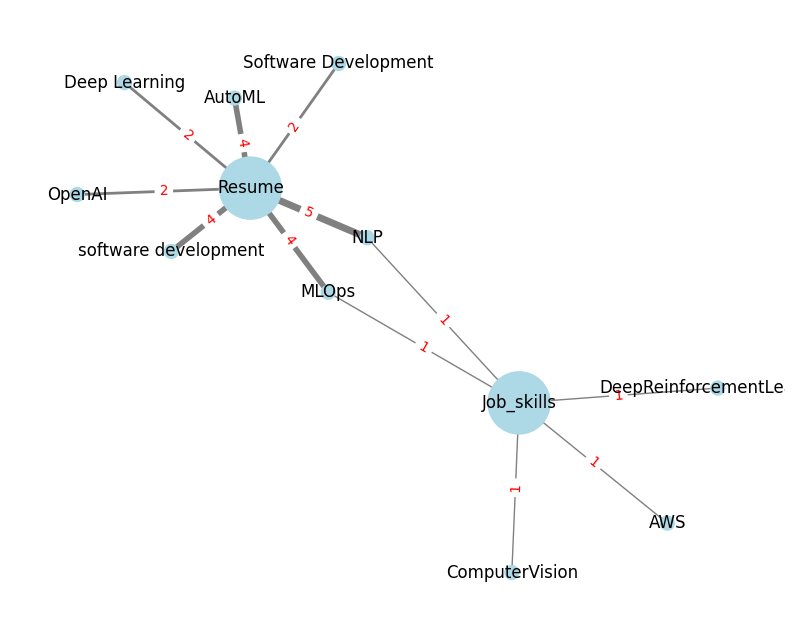

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
graph = nx.Graph()

# Add the main 'Resume' node
graph.add_node('Resume', size=2000)

# List of skills with corresponding years of experience
skills = {'Python': 5, 'Java': 3, 'Machine Learning': 7, 'Data Analysis': 4}


# Add 'skill' nodes and edges connecting them to the 'Resume' node with weighted edges
for skill in skills_cv.iterrows(): # iterate over each skill in order to create a node and connection to the resume node
    experience = skill[1]['Experience']
    skill = skill[1]['skill_description']
    graph.add_node(skill)
    graph.add_edge('Resume', skill, weight=experience)


# Add the main 'Job_skills' node
graph.add_node('Job_skills', size=2000)

# List of skills for the 'Job_skills' node
job_skills = ['MLOps', 'AWS', 'NLP', 'ComputerVision', 'DeepReinforcementLearning']

# Add 'skill' nodes and edges connecting them to the 'Job_skills' node
for skill in job_skills:
    graph.add_node(skill)
    graph.add_edge('Job_skills', skill, weight=1)

weights = [graph.edges[edge]['weight'] for edge in graph.edges]
node_sizes = [graph.nodes[node]['size'] if ((node == 'Resume') | (node =='Job_skills')) else 100 for node in graph.nodes]
# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(graph)
nx.draw_networkx(graph, pos, with_labels=True, node_color='lightblue', font_size=12, font_color='black',
                 node_size=node_sizes,edge_color='grey', width=weights)
edge_labels = {(u, v): graph.edges[u, v]['weight'] for u, v in graph.edges}
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')

plt.axis('off')
plt.show()